<a href="https://colab.research.google.com/github/anujvaghani0/Cryptography-and-Network-Security/blob/main/Hotel_Booking_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Hotel Booking Demand EDA 
---



The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)

In [ ]:
url = 'https://raw.githubusercontent.com/salves94/hotel-exploratory-data-analysis/master/hotel_bookings.csv'
df = pd.read_csv(url)

## **We check how many rows has the dataset**

In [ ]:
len(df.index)

119390

**Now lets check how many cells are *missing* from our dataset.**


In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**We can see that we have 4 columns with missing values. Lets check these values as percentages.**

In [ ]:
df.isnull().sum()/len(df.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

**The columns “agent” and “company” have a high percentage of missing values. As these columns won’t be relevant for our analysis, we can delete them.**

In [ ]:
df=df.drop(['agent','company'],axis=1)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


**The columns “children” and “country” have a low percentage of missing values. We will remove the full row on missing cells.**

In [ ]:
df = df.dropna(axis = 0) # We delete rows with empty cells

In [ ]:
df = df.drop(labels='days_in_waiting_list', axis=1) # We delete days_in_waiting_list column


In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

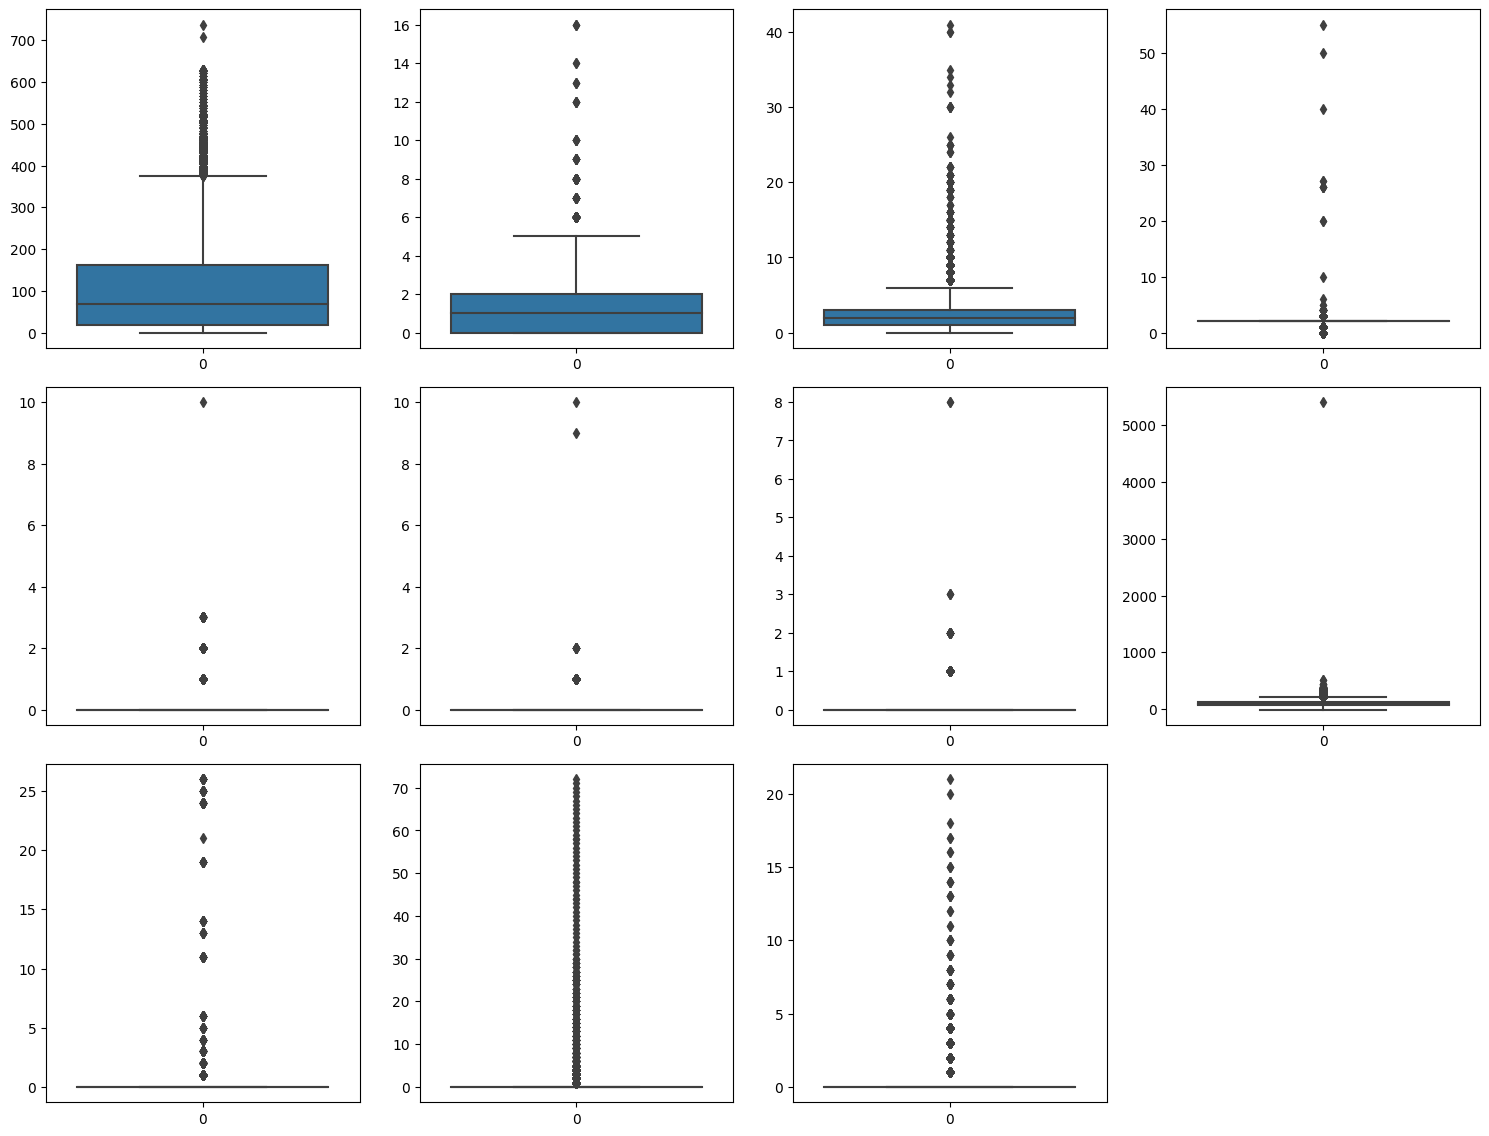

In [ ]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(15,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

**We remove the outliers by using conditionals to get and update these values.**



In [ ]:
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000

**We removed the outliers. Our data is clean now.**

### **Exploratory Analysis and Visualization**
In this section, we will explore the data to get insights about it.

Lets merge ‘children’ and ‘babies’ columns into ‘kids’ column.

Then, we set the string type to the corresponding columns.

In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df['kids'] = df.children + df.babies
#Combine total mumbers by adding kids and adults
df['total_members'] = df.kids + df.adults
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')

Lets convert arrival date to datetime
bold text



In [ ]:
df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

# **(a) Cancelled bookings**


In [ ]:
print('Total Bookings cancelled')
print(df.is_canceled.value_counts())

Total Bookings cancelled
0    74745
1    44153
Name: is_canceled, dtype: int64


In [ ]:
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True))

Cancelation percentage
0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


**Now lets plot this result.**

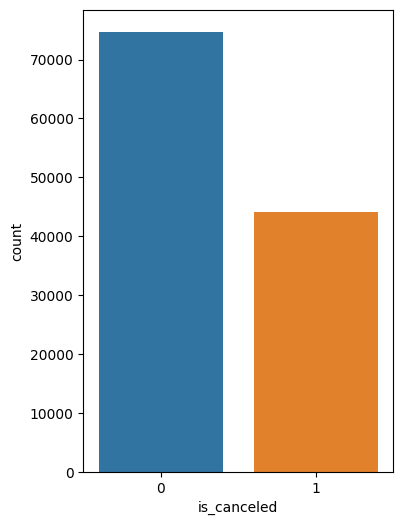

In [ ]:
plt.figure(figsize=(4,6))

#Canceled=1, Not canceled= 0
sns.countplot(x='is_canceled',data=df)
plt.show()

# **(b) Confirmed bookings**
Lets see how many confirmed bookings per month there are

In [ ]:
import datetime as dt

confirmed_bookings = df[df.is_canceled=='0']
confirmed_bookings['arrival_date_month'] = df['arrival_date'].dt.month
final=confirmed_bookings['arrival_date_month'].value_counts().sort_index()
final

<ipython-input-21-8d9b77dfd659>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_bookings['arrival_date_month'] = df['arrival_date'].dt.month


1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: arrival_date_month, dtype: int64

**The confirmed bookings goes from their lower value (4068) in january to their highest value (8618) in august.**

## **c) Country**

Here we will check the country of origin. Categories are represented in the ISO 3155–3:2013 format.

In [ ]:
df.country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 177, dtype: float64

## **(D)Month**

In [ ]:
df.arrival_date_month.value_counts(normalize=True)


August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

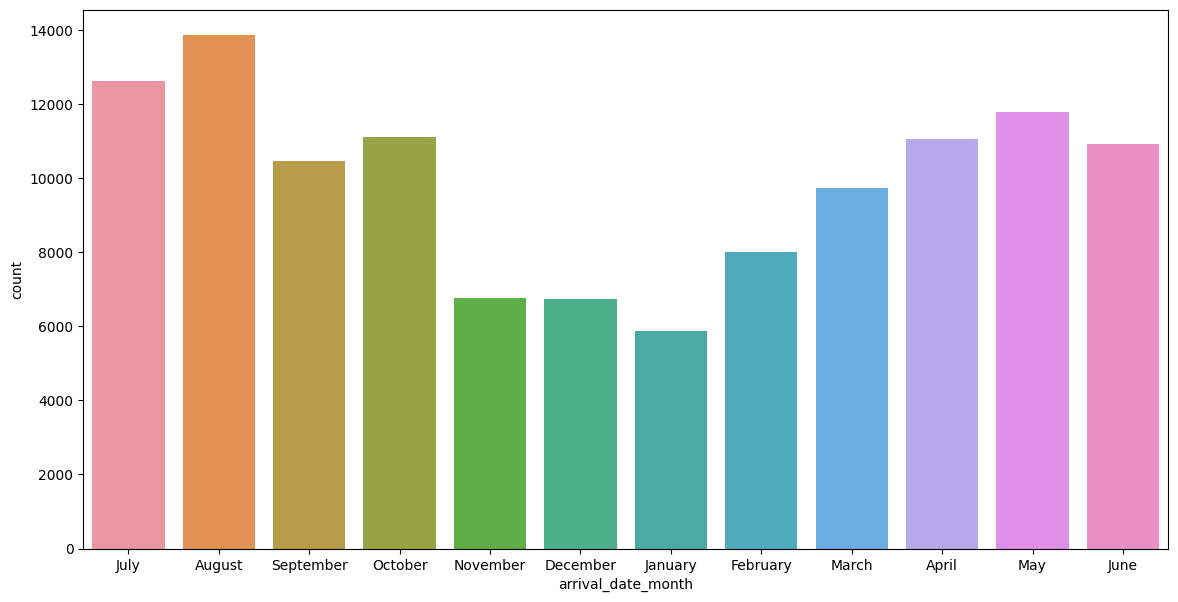

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='arrival_date_month',data=df)
plt.show()

### **E) Year**

In [ ]:
df.arrival_date_year.value_counts(normalize=True)

2016    0.474651
2017    0.341503
2015    0.183847
Name: arrival_date_year, dtype: float64

In [ ]:
df['arrival_date_year'].value_counts()

2016    56435
2017    40604
2015    21859
Name: arrival_date_year, dtype: int64

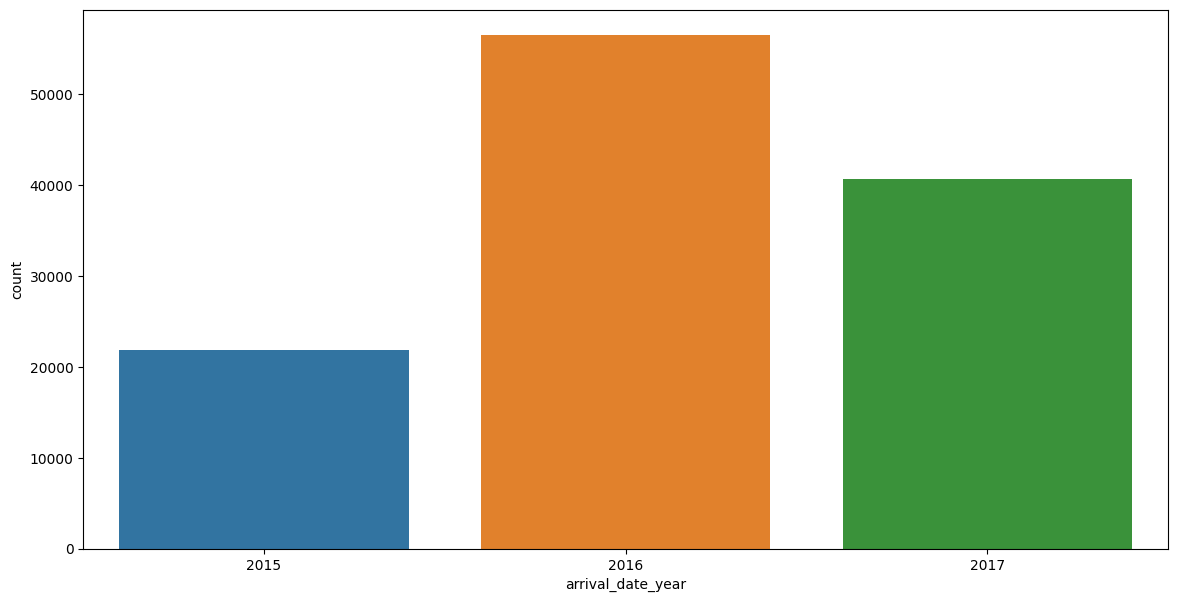

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='arrival_date_year',data=df)
plt.show()

### **F) Market Segment**

**Lets check the Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”**

In [ ]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [ ]:
df.market_segment.value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

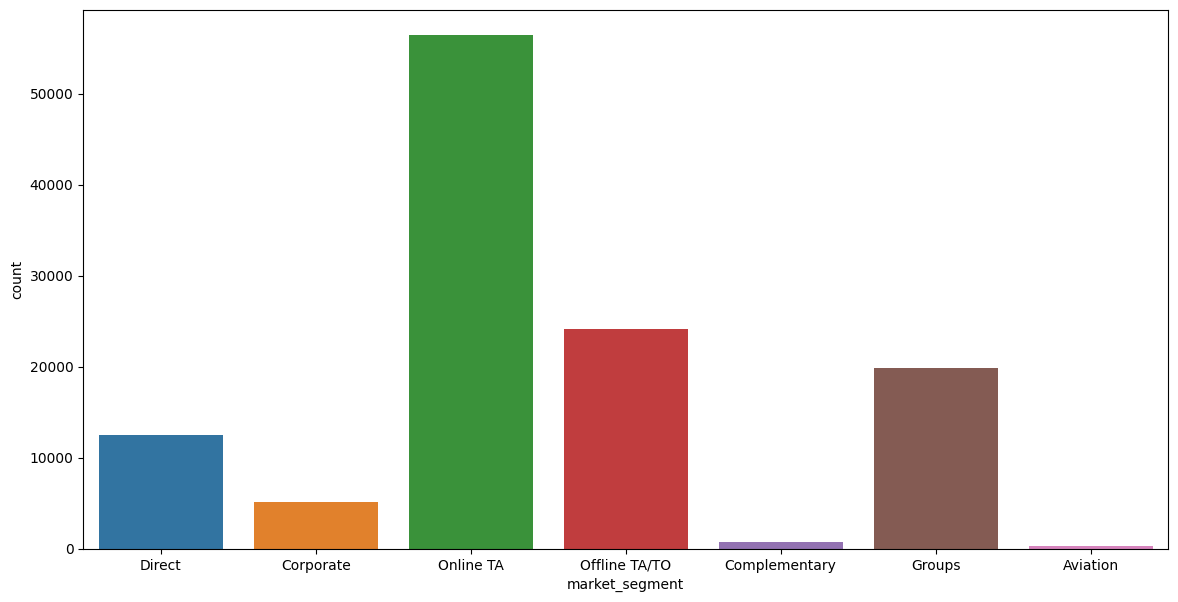

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='market_segment',data=df)
plt.show()


#g) Meal
Type of meal booked. Categories are presented in standard hospitality meal packages:</br>
SC — no meal package;<br/>
Undefined — no meal package;<br/>
BB — Bed & Breakfast;<br/>
 HB — Half board (breakfast and one other meal — usually dinner);<br/>
FB — Full board (breakfast, lunch and dinner)

In [ ]:
df.meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

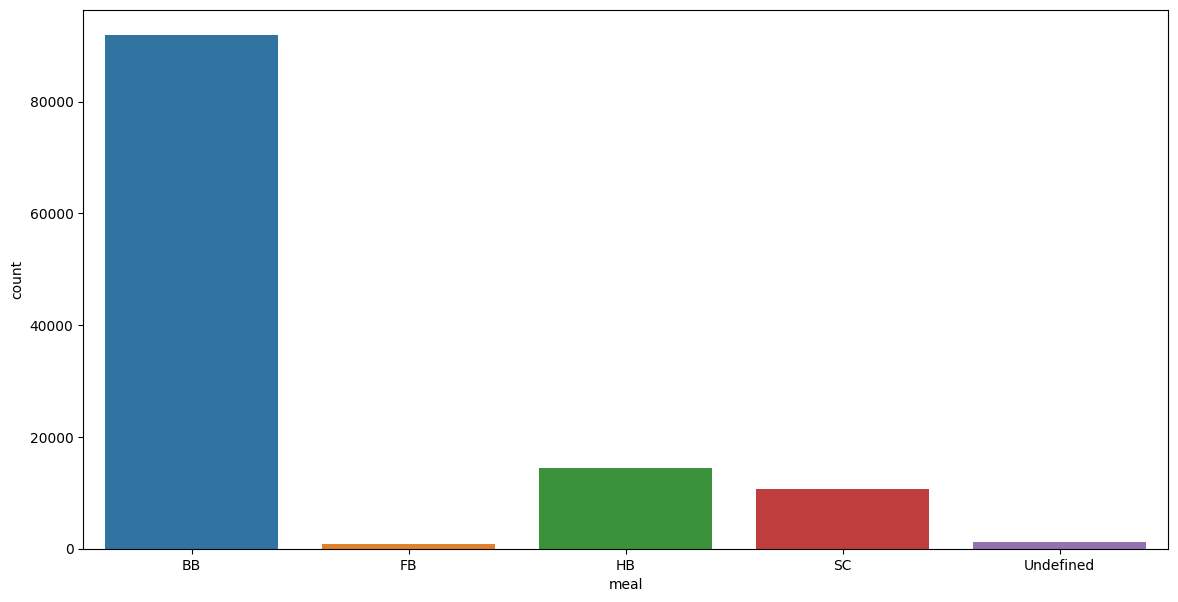

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='meal',data=df)
plt.show()

In [ ]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B', 'P'], dtype=object)

# **(I)Reserved Room type**

Code of room type reserved. Code is presented instead of designation for anonymity reasons.

In [ ]:
df.reserved_room_type.value_counts(normalize=True)

A    0.719953
D    0.161256
E    0.054643
F    0.024307
G    0.017519
B    0.009369
C    0.007830
H    0.005055
L    0.000050
P    0.000017
Name: reserved_room_type, dtype: float64

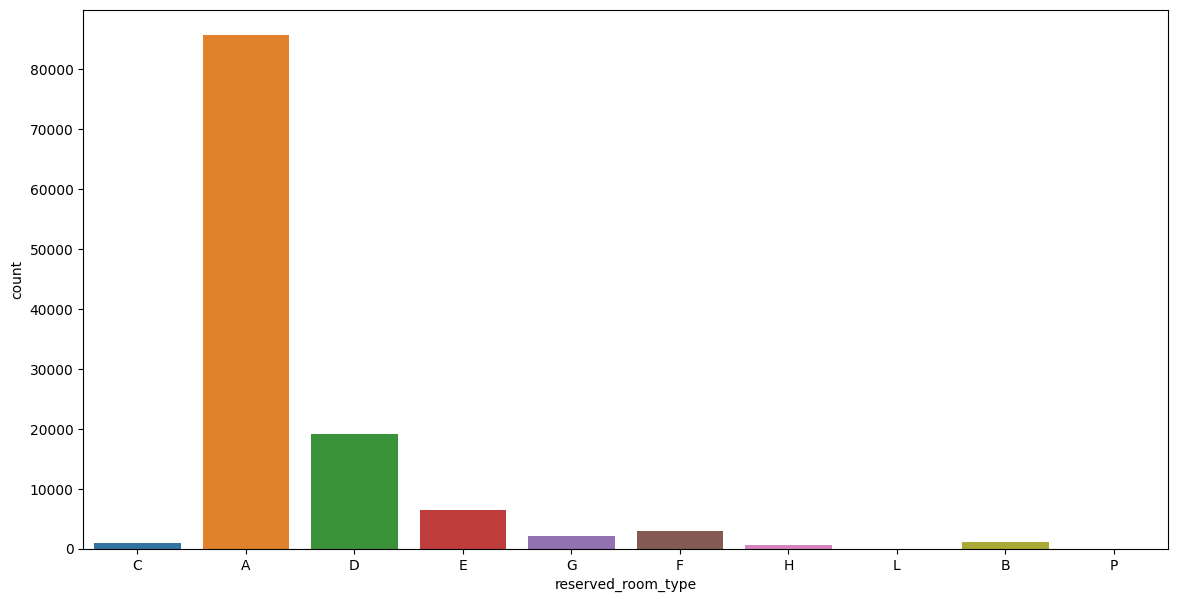

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='reserved_room_type',data=df)
plt.show()

## H) Customer Type
Type of booking, assuming one of four categories:

Contract — when the booking has an allotment or other type of contract associated to it;</br>
Group — when the booking is associated to a group;</br>
Transient — when the booking is not part of a group or contract, and is not associated to other transient booking;</br>
Transient-party — when the booking is transient, but is associated to at least other transient *booking*

In [ ]:
df.customer_type.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: customer_type, dtype: float64

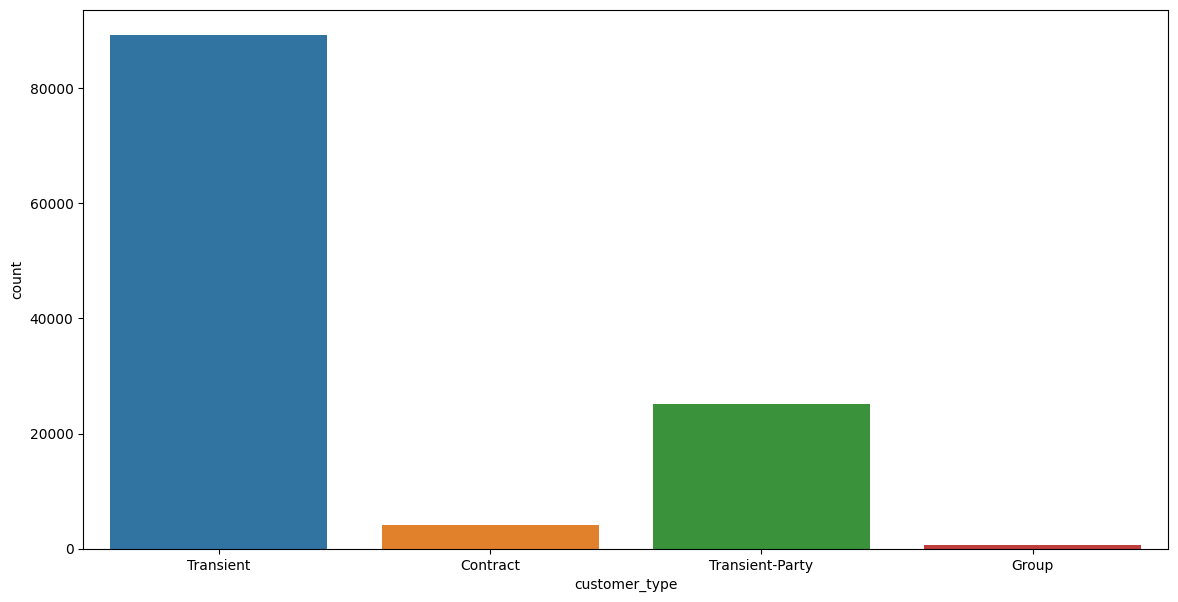

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='customer_type',data=df)
plt.show()

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,total_members,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0,2015-07-01


new consept

In [ ]:
df.distribution_channel.value_counts(normalize=True)

TA/TO        0.821965
Direct       0.121810
Corporate    0.054593
GDS          0.001623
Undefined    0.000008
Name: distribution_channel, dtype: float64

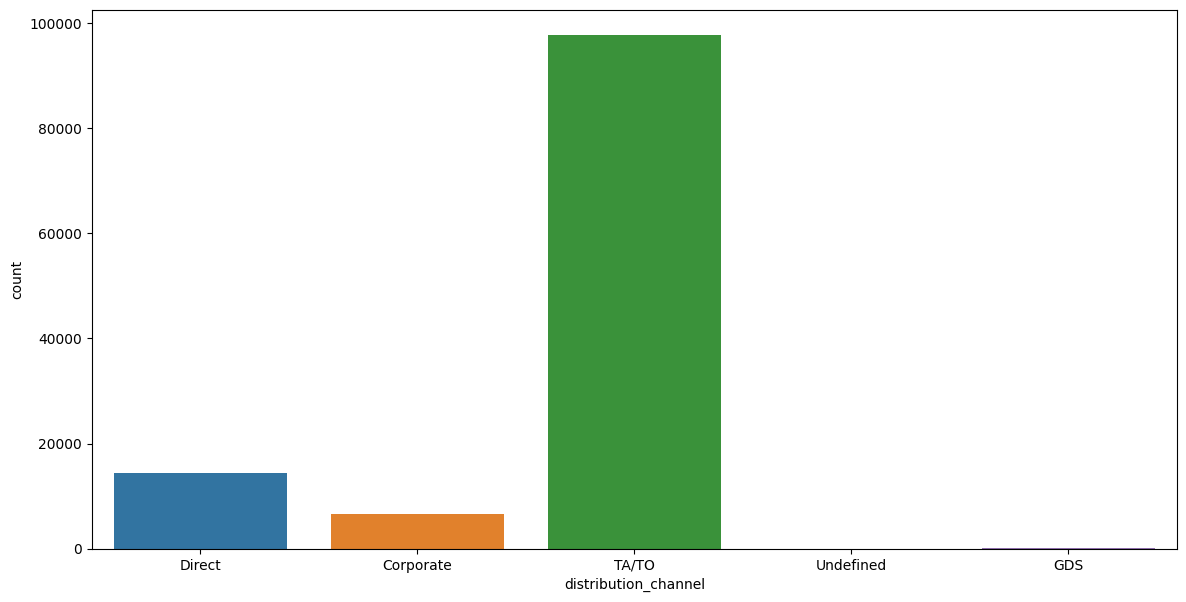

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='distribution_channel',data=df)
plt.show()

In [ ]:
# Q2) Which room type is in most demand and which room type generates highest adr?



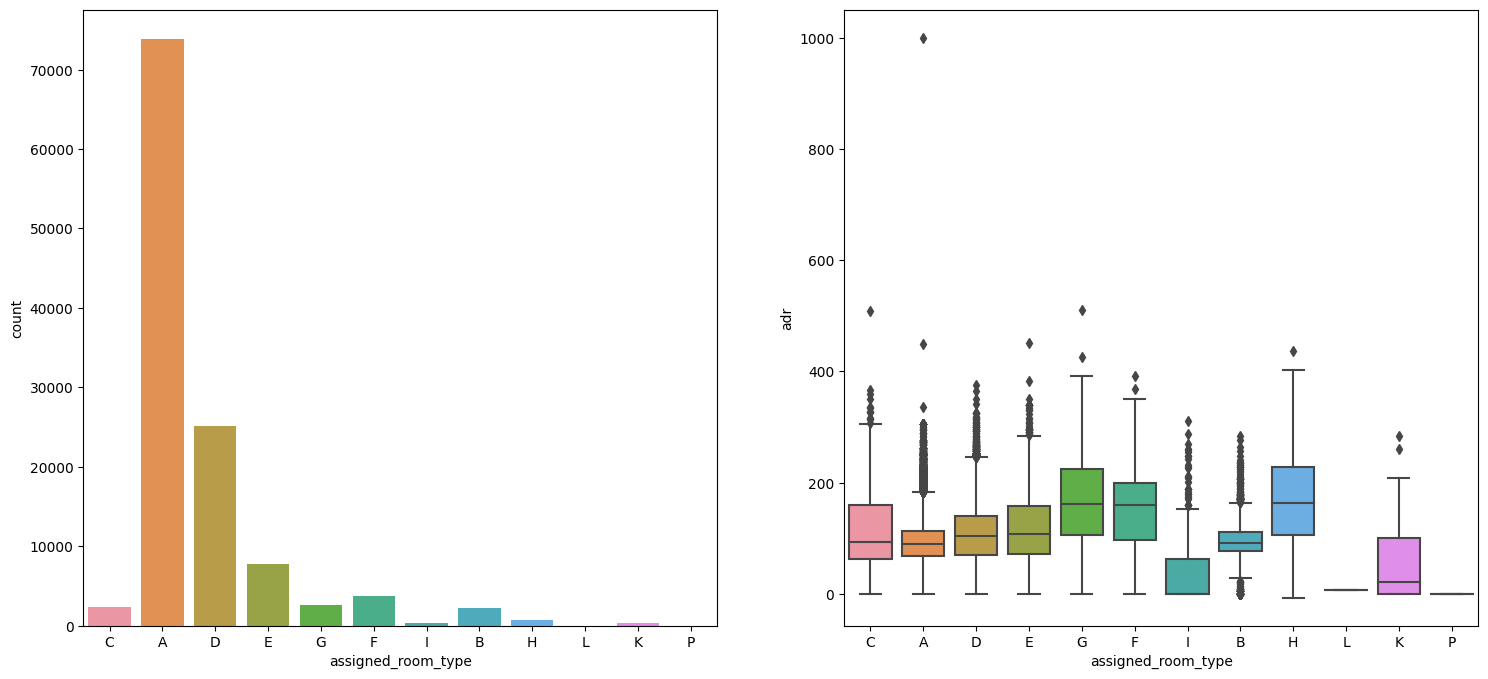

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df.groupby('assigned_room_type')
df['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df['assigned_room_type'], y = df['adr'])
plt.show()

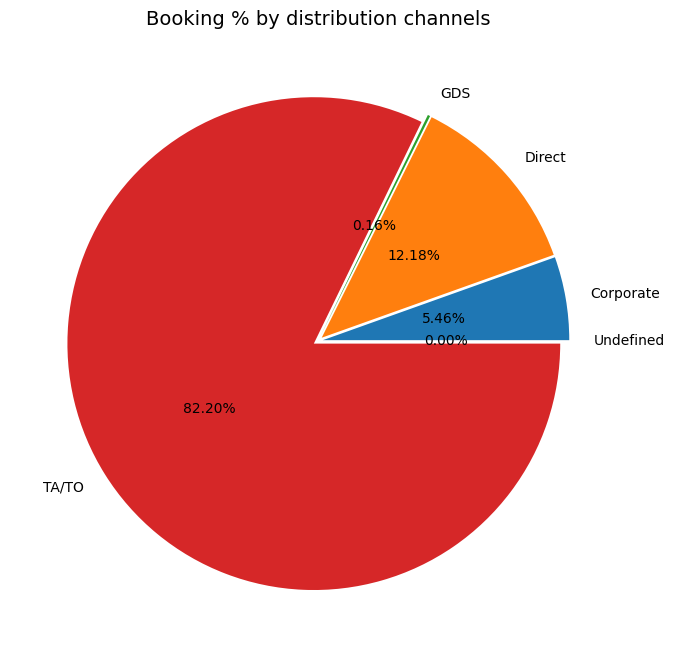

In [ ]:
group_by_dc = df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.02]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

In [ ]:
# p) Total Members


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,total_members,arrival_date,Num_of_bookings
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01,NaN
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01,NaN
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01,NaN
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0,2015-07-01,NaN


In [ ]:
df.total_members.value_counts()

2.0    81882
1.0    22290
3.0    10479
4.0     3942
0.0      170
5.0      135
Name: total_members, dtype: int64

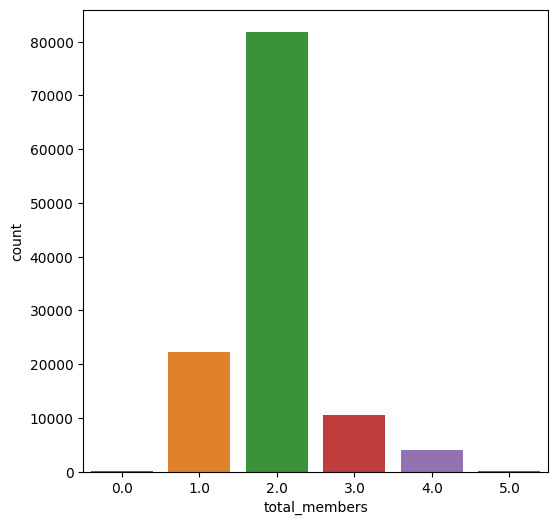

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='total_members',data=df)
plt.show()

<!-- reservation_status -->

In [ ]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

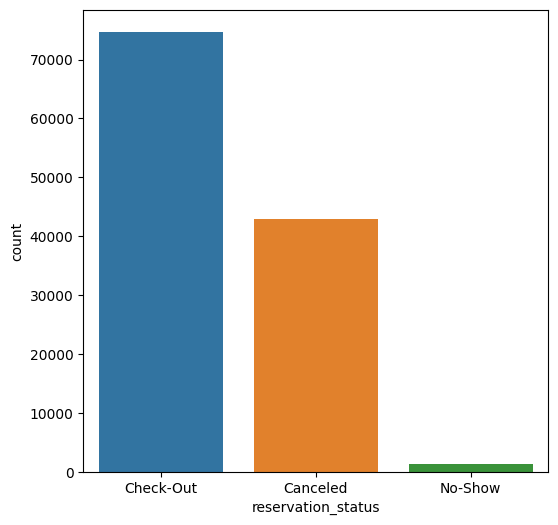

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='reservation_status',data=df)
plt.show()

In [ ]:
# total day 

In [ ]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,total_members,arrival_date,Num_of_bookings,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01,NaN,0
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01,NaN,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01,NaN,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01,NaN,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0,2015-07-01,NaN,2


In [ ]:
stay = df.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,324
1,0,Resort Hotel,377
2,1,City Hotel,13271
3,1,Resort Hotel,7525
4,2,City Hotel,21424
5,2,Resort Hotel,6105
6,3,City Hotel,21366
7,3,Resort Hotel,5659
8,4,City Hotel,12556
9,4,Resort Hotel,4807


<Axes: xlabel='total_nights', ylabel='Number of stays'>

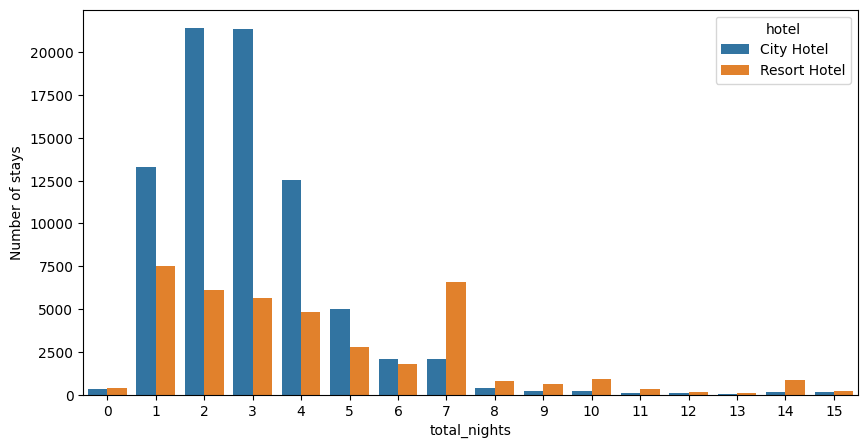

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_nights', y = 'Nstaysumber of ',data= stay,hue='hotel')

In [ ]:
# t) Average Daily Rate (ADR)


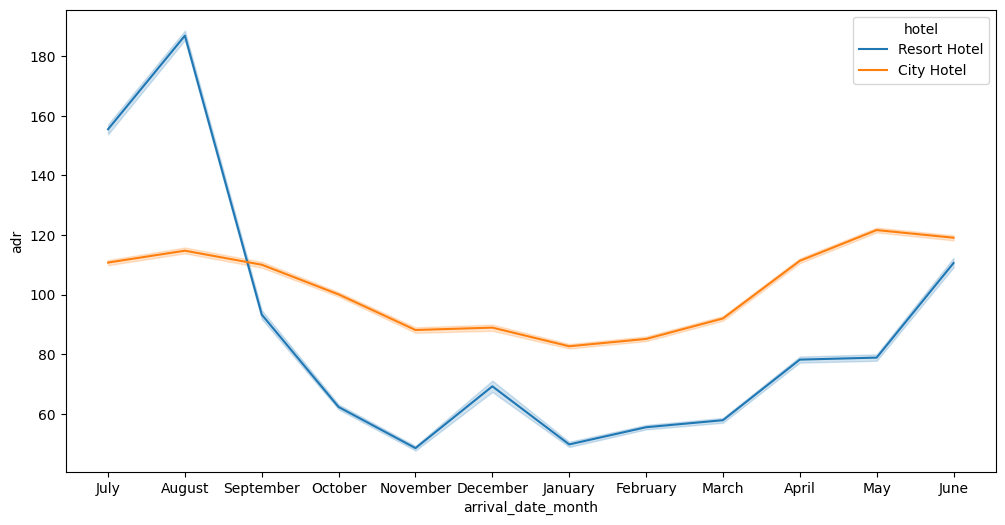

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()